Students: Yannick Furtado, Shoaib Ahmed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.decomposition import KernelPCA


In [ ]:
df2 = pd.read_csv('DataKPCA.csv')

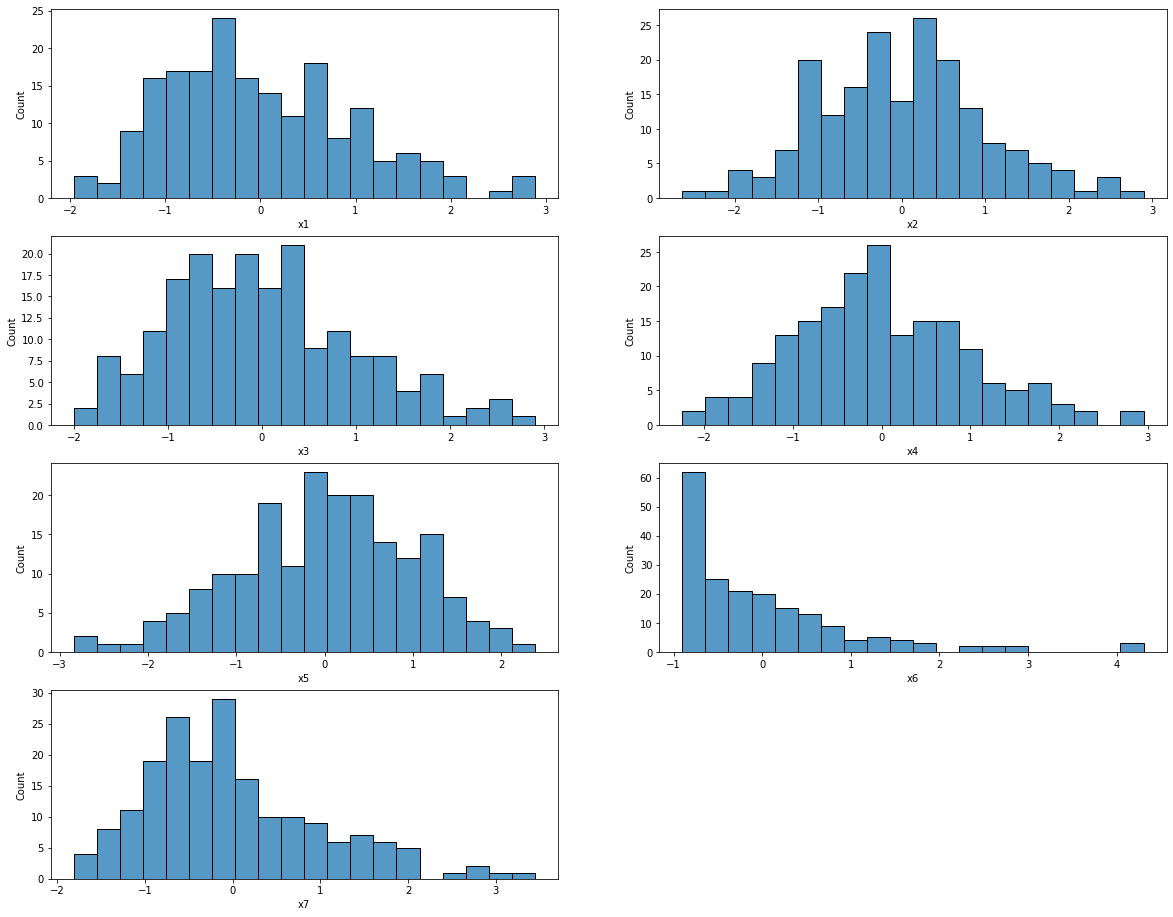

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(421)
sns.histplot(df2.x1,bins = 20)

plt.subplot(422)
sns.histplot(df2.x2,bins = 20)

plt.subplot(423)
sns.histplot(df2.x3,bins = 20)

plt.subplot(424)
sns.histplot(df2.x4,bins = 20)

plt.subplot(425)
sns.histplot(df2.x5,bins = 20)

plt.subplot(426)
sns.histplot(df2.x6,bins = 20)

plt.subplot(427)
sns.histplot(df2.x7,bins = 20)

plt.show()

We observe that except for x6 and x7, the features are approximately gaussian distributed

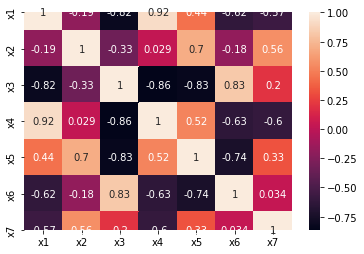

In [ ]:

sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
df2 = (df2 - df2.mean(axis=0))/df2.std(axis=0) # Normalising the data to make it 0-centric

Since we are projecting the data onto a higher dimesnsion and with a kernel function, we cannot compare the variance of projected and original data, hence we will consider variance of each feature as proportion of sum of variances

In [ ]:
kpca = KernelPCA(n_components = None,kernel = 'rbf',gamma=0.1)
X_trans = kpca.fit_transform(df2)

In [ ]:
X_trans_var = np.var(X_trans,axis=0)
cumulative_var = np.cumsum(X_trans_var)/np.sum(X_trans_var)

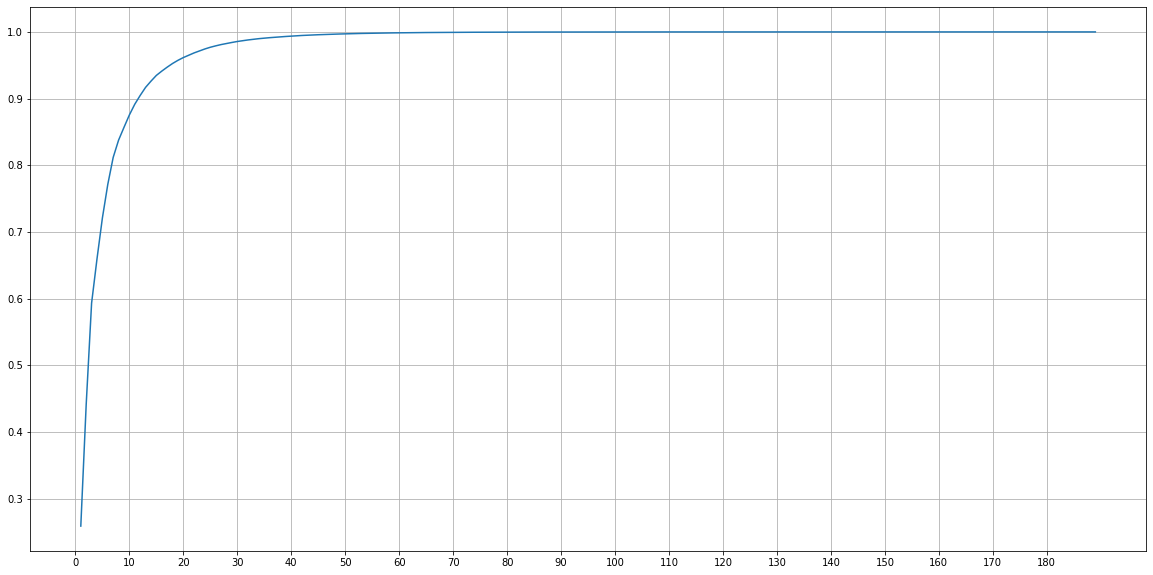

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,190),cumulative_var)
plt.grid()
plt.xticks(range(0,190,10))
plt.show()

When we plot the data in 190 dimensions(default)
We see that 95% of the total variance occurs in the first 20 dimensions, and almost all variance is covered in 50 dimesnsions

In [ ]:
kpca2 = KernelPCA(n_components = 10,kernel = 'rbf',gamma=0.1)
X_trans2 = kpca2.fit_transform(df2)

X_trans_var2 = np.var(X_trans2,axis=0)
cumulative_var2 = np.cumsum(X_trans_var2)/np.sum(X_trans_var2)

In [ ]:
kpca3 = KernelPCA(n_components = 10,kernel = 'rbf',gamma=1)
X_trans3 = kpca3.fit_transform(df2)

X_trans_var3 = np.var(X_trans3,axis=0)
cumulative_var3 = np.cumsum(X_trans_var3)/np.sum(X_trans_var3)

In [ ]:
kpca4 = KernelPCA(n_components = 10,kernel = 'rbf',gamma=0.1)
X_trans4 = kpca4.fit_transform(df2)

X_trans_var4 = np.var(X_trans4,axis=0)
cumulative_var4 = np.cumsum(X_trans_var4)/np.sum(X_trans_var4)

In [ ]:
kpca5 = KernelPCA(n_components = 10,kernel = 'rbf',gamma=0.001)
X_trans5 = kpca5.fit_transform(df2)

X_trans_var5 = np.var(X_trans5,axis=0)
cumulative_var5 = np.cumsum(X_trans_var5)/np.sum(X_trans_var5)

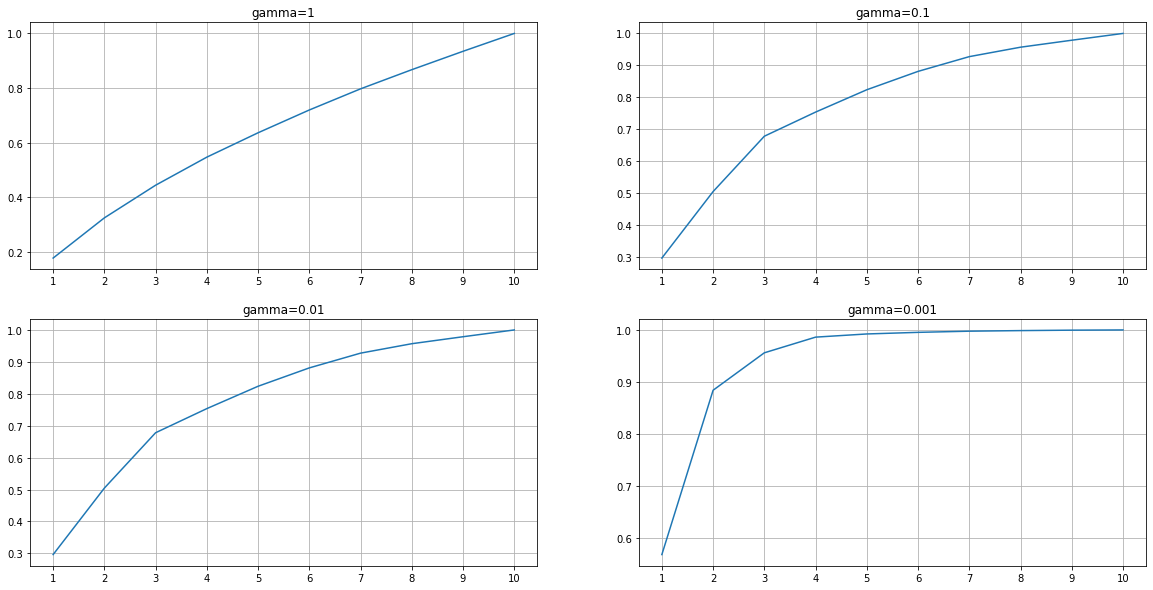

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(range(1,11),cumulative_var3)
plt.grid()
plt.xticks(range(1,11))
plt.title('gamma=1')
plt.subplot(222)
plt.plot(range(1,11),cumulative_var2)
plt.grid()
plt.xticks(range(1,11))
plt.title('gamma=0.1')
plt.subplot(223)
plt.plot(range(1,11),cumulative_var4)
plt.grid()
plt.xticks(range(1,11))
plt.title('gamma=0.01')

plt.subplot(224)
plt.plot(range(1,11),cumulative_var5)
plt.grid()
plt.xticks(range(1,11))
plt.title('gamma=0.001')

plt.show()

We observe that as the value of gamma decreases (i.e spread decreases) , the variance gets concentrated in the initial few features.
For gamma = 1, we can say that the variance is more or less uniformly distributed among all features, while for gamma = 0.001, the variance was mosty spread in first 4 features.